In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import models, layers
import visualkeras
from PIL import ImageFont

In [2]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()

In [3]:
print("Shape of the training data : ",train_X.shape)
print("Shape of the training data : ",train_y.shape)

print("Shape of the testing data : ",test_X.shape)

Shape of the training data :  (60000, 28, 28)
Shape of the testing data :  (10000, 28, 28)


In [4]:
class_names = ["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]

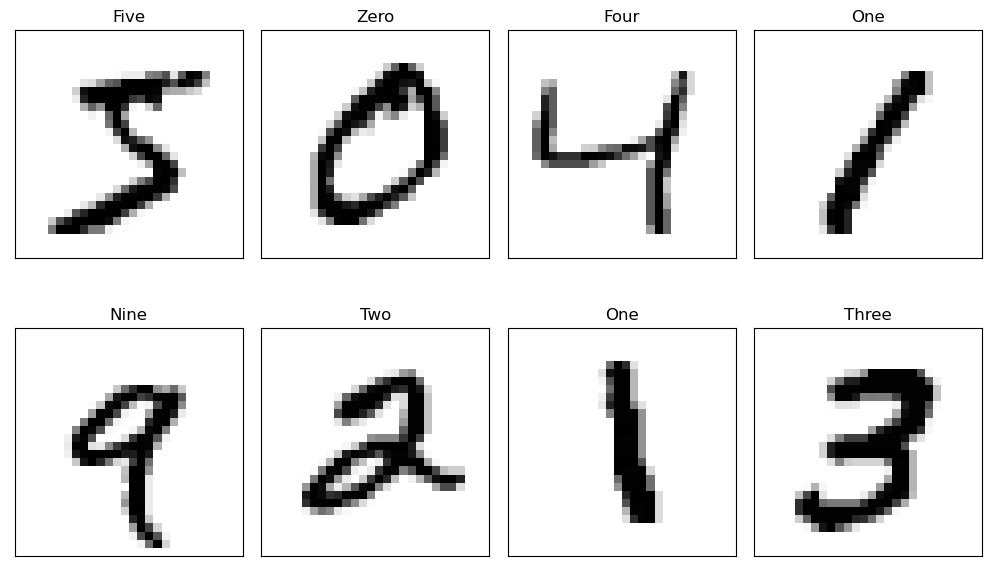

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(10,8))
axes = axes.ravel()

for i in range(8):
    axes[i].imshow(train_X[i], cmap=plt.cm.binary)
    axes[i].set_title(class_names[train_y[i]])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    fig.tight_layout(pad=1)
plt.show()  

In [6]:
train_X, test_X = train_X / 255.0, test_X / 255.0

In [8]:
epoch = 20
batch_size = 64
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

History = model.fit(train_X,train_y,validation_data=(test_X, test_y),epochs=epoch, batch_size = batch_size)

loss,accuracy = model.evaluate(test_X,test_y)
print("Loss",loss)
print("accuracy",accuracy)

Epoch 1/20
938/938 [==============================] - 105s 108ms/step - loss: 0.2193 - accuracy: 0.9308 - val_loss: 0.0440 - val_accuracy: 0.9861
Epoch 2/20
938/938 [==============================] - 89s 95ms/step - loss: 0.0739 - accuracy: 0.9771 - val_loss: 0.0346 - val_accuracy: 0.9884
Epoch 3/20
938/938 [==============================] - 72s 77ms/step - loss: 0.0562 - accuracy: 0.9827 - val_loss: 0.0252 - val_accuracy: 0.9914
Epoch 4/20
938/938 [==============================] - 72s 77ms/step - loss: 0.0484 - accuracy: 0.9857 - val_loss: 0.0254 - val_accuracy: 0.9923
Epoch 5/20
938/938 [==============================] - 69s 73ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0227 - val_accuracy: 0.9924
Epoch 6/20
938/938 [==============================] - 72s 76ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0212 - val_accuracy: 0.9931
Epoch 7/20
938/938 [==============================] - 71s 76ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0205 - val_accurac

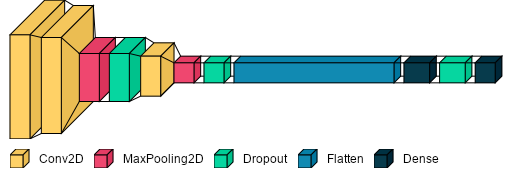

In [9]:
font = ImageFont.truetype("arial.ttf", 12)  
visualkeras.layered_view(model, legend=True, font=font) 

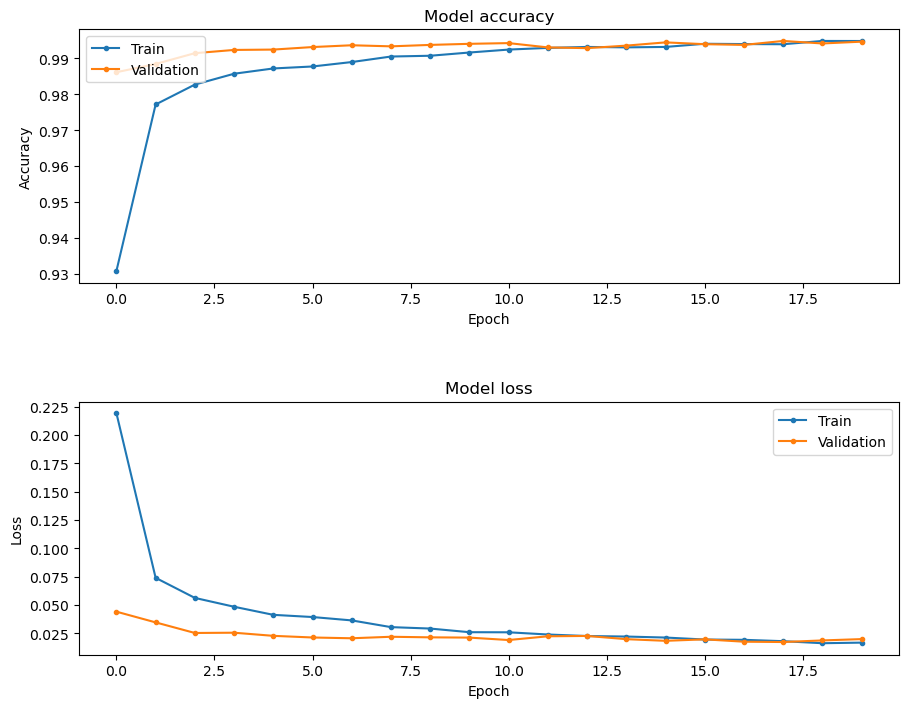

In [10]:
fig, ax = plt.subplots(2, figsize = (10,8))
ax[0].plot(History.history['accuracy'],marker = '.')
ax[0].plot(History.history['val_accuracy'] , marker = '.')
ax[0].set_title('Model accuracy')
ax[0].set(ylabel = 'Accuracy')
ax[0].set(xlabel = 'Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')
ax[1].plot(History.history['loss'],marker = '.')
ax[1].plot(History.history['val_loss'] , marker = '.')
ax[1].set_title('Model loss')
ax[1].set(ylabel = 'Loss')
ax[1].set(xlabel = 'Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')
fig.tight_layout(pad=4)
plt.show()


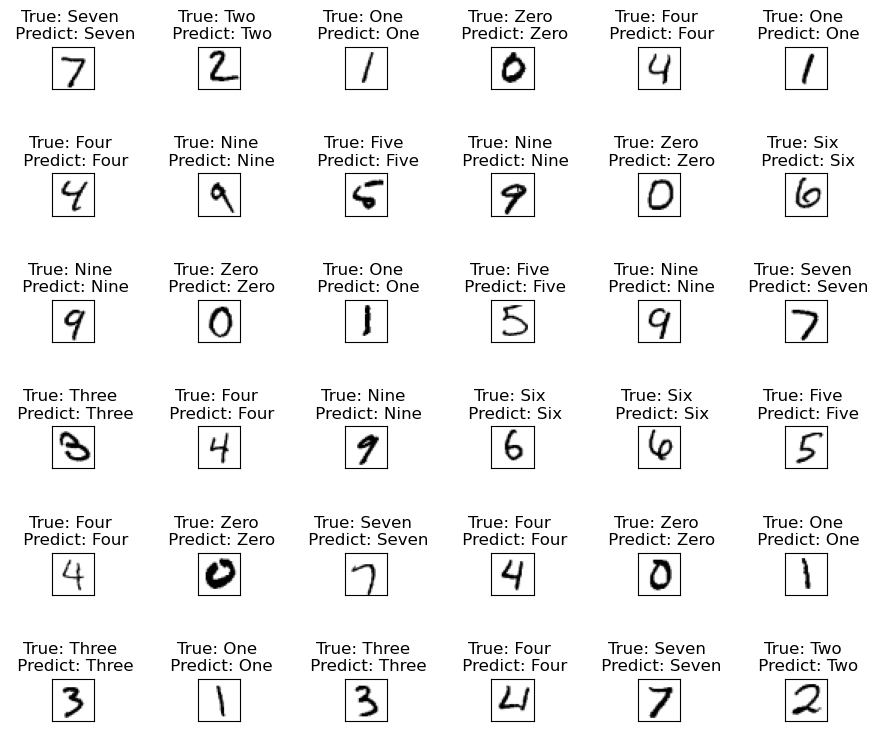

In [11]:
fig, axes = plt.subplots(6, 6, figsize=(10,8))
axes = axes.ravel()

for i in range(36):
    axes[i].imshow(test_X[i], cmap=plt.cm.binary)
    prediction = model.predict(np.array([test_X[i]]), verbose = 0)
    index = np.argmax(prediction)
    axes[i].set_title("True: %s \n Predict: %s" % (class_names[ test_y[i]], class_names[index]))
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    fig.tight_layout(pad=3)
plt.show()  

In [12]:
model.save('mnist_classification_20epochs.model')

INFO:tensorflow:Assets written to: mnist_classification_20epochs.model\assets


INFO:tensorflow:Assets written to: mnist_classification_20epochs.model\assets
